<a href="https://colab.research.google.com/github/phaseflowcentral/hurwitz_combinatorics/blob/main/gaussian_copula_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install sdv
# RESTART RUNTIME AFTER

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!unzip /content/drive/MyDrive/tinkoff_data_gen/dataset_train.csv.zip -d dataset_train # Replace with your path lmao

Archive:  /content/drive/MyDrive/tinkoff_data_gen/dataset_train.csv.zip
  inflating: dataset_train/dataset_train.csv  


Baseline на трех фичах

In [ ]:
df = pd.read_csv('/content/dataset_train/dataset_train.csv')
high_cols=['target_1', 'source1_feature9', 'source2_feature15', 'source2_feature13']
df_exp=df[high_cols]

df_test=df_exp.sample(frac=0.7)
df_train=df_exp.drop(df_test.index)
X_train=df_train.drop('target_1', axis=1).fillna(-20)
y_train=df_train['target_1']
X_test=df_test.drop('target_1', axis=1).fillna(-20)
y_test=df_test['target_1']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 5000, C = 0.001)
logreg.fit(X_train, y_train)
y_pred=logreg.predict_proba(X_test)[:,1:2]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.586105280463456

С cэмплом из Copula

In [4]:
from sdv.tabular import GaussianCopula
copula = GaussianCopula()

In [5]:
df_minority=df_train.loc[df_exp['target_1']==1]
copula.fit(df_minority)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [6]:
df_sample=copula.sample(1000000)

In [7]:
df_combined=pd.concat([df_train, df_sample]) 

In [8]:
X_train=df_combined.drop('target_1', axis=1).fillna(-20)
y_train=df_combined['target_1']

logreg = LogisticRegression(max_iter = 5000, C = 0.001)
logreg.fit(X_train, y_train)
y_pred=logreg.predict_proba(X_test)[:,1:2]

roc_auc_score(y_test, y_pred)

0.5842313825671472

# Распределения до и после

Column target_1 original then combined


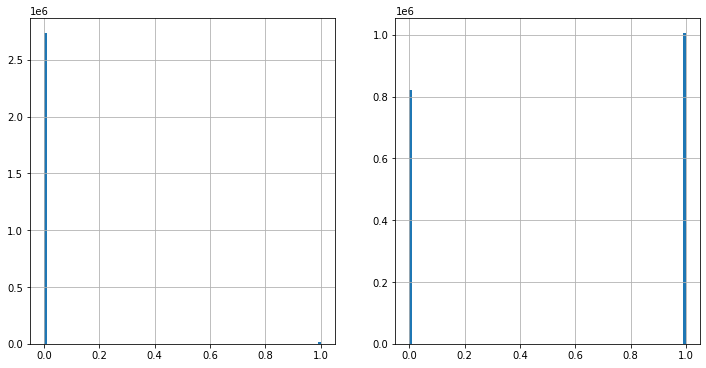

Column source1_feature9 original then combined


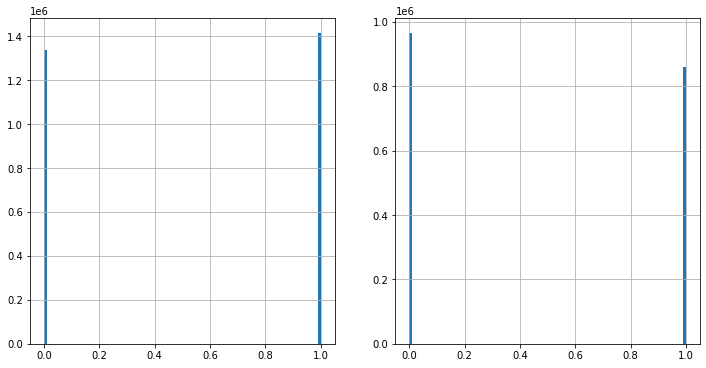

Column source2_feature15 original then combined


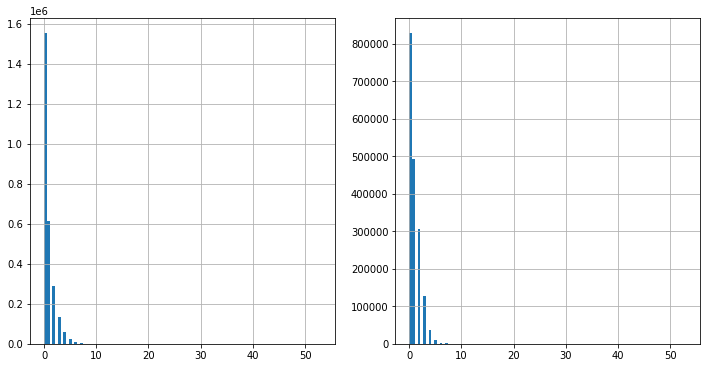

Column source2_feature13 original then combined


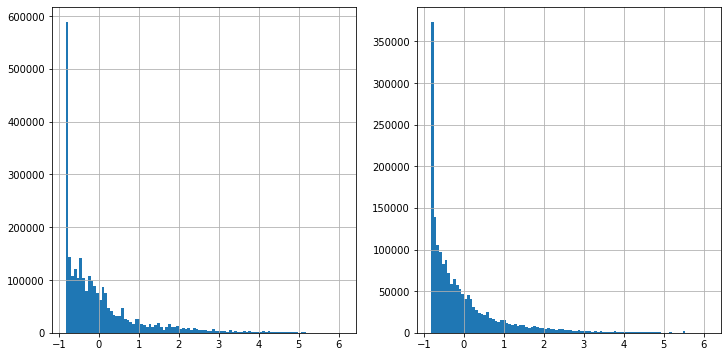

In [9]:
for col in df_exp.columns:
  print("Column", col, "original then combined")
  plt.subplot(1, 2, 1)
  df_exp[col].hist(bins=100, figsize=(12, 6))
  plt.subplot(1, 2, 2)
  df_combined[col].hist(bins=100, figsize=(12, 6))
  plt.show()

### Проблемы с GaussianCopula: она не понимает наши дурацкие распределения.

Распределения в настоящем minority классе и в сэмпле, смотрите на source1_feature14

Column target_1 in minority class, original then sample


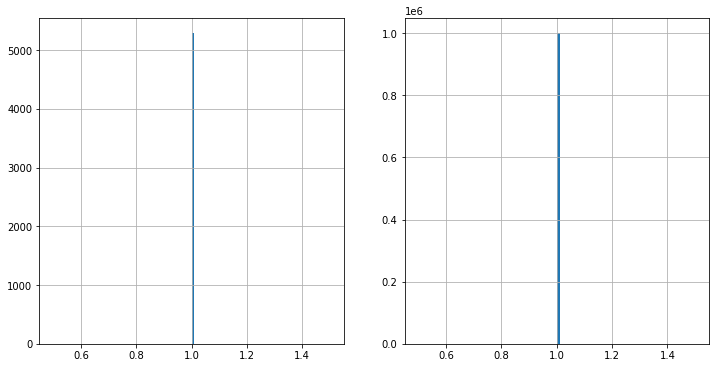

Column source1_feature14 in minority class, original then sample


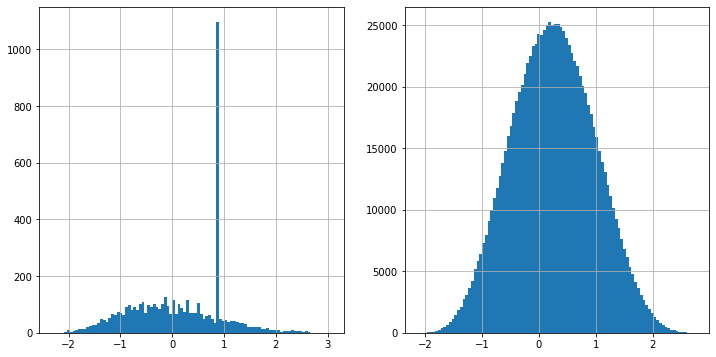

Column source2_feature15 in minority class, original then sample


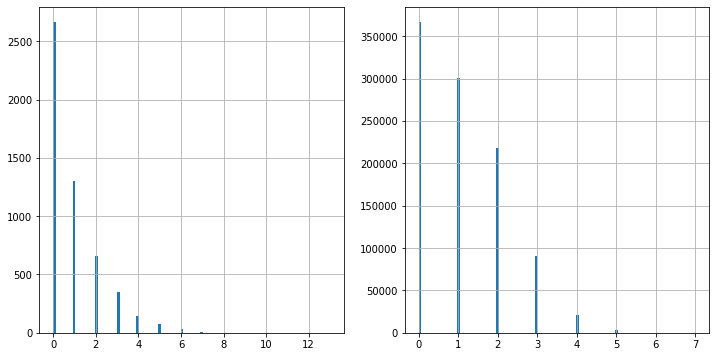

Column source2_feature13 in minority class, original then sample


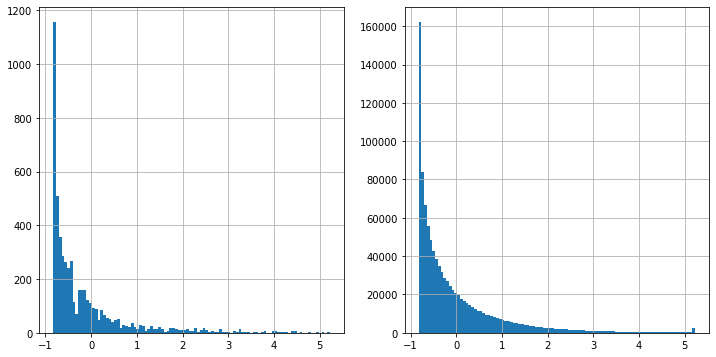

In [ ]:
for col in df_exp.columns:
  print("Column", col, "in minority class, original then sample")
  plt.subplot(1, 2, 1)
  df_minority[col].hist(bins=100, figsize=(12, 6))
  plt.subplot(1, 2, 2)
  df_sample[col].hist(bins=100, figsize=(12, 6))
  plt.show()